In [1]:
## For Network Analysis and Visualization
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.karate_club_graph()
print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
# Show the nodes
nx.nodes(G)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [4]:
# Show the edges
nx.edges(G)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

Using a standard "spring model" layout we can immediately see the two highly connected nodes using the hot and cold degree colorscale. On the left there is also an isolated group connected to node 0. The interesting Characters here are deffinetly nodes 0 and 33 as well as 1, 2, and 32 

<ipython-input-5-917af9986f14>:5: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")


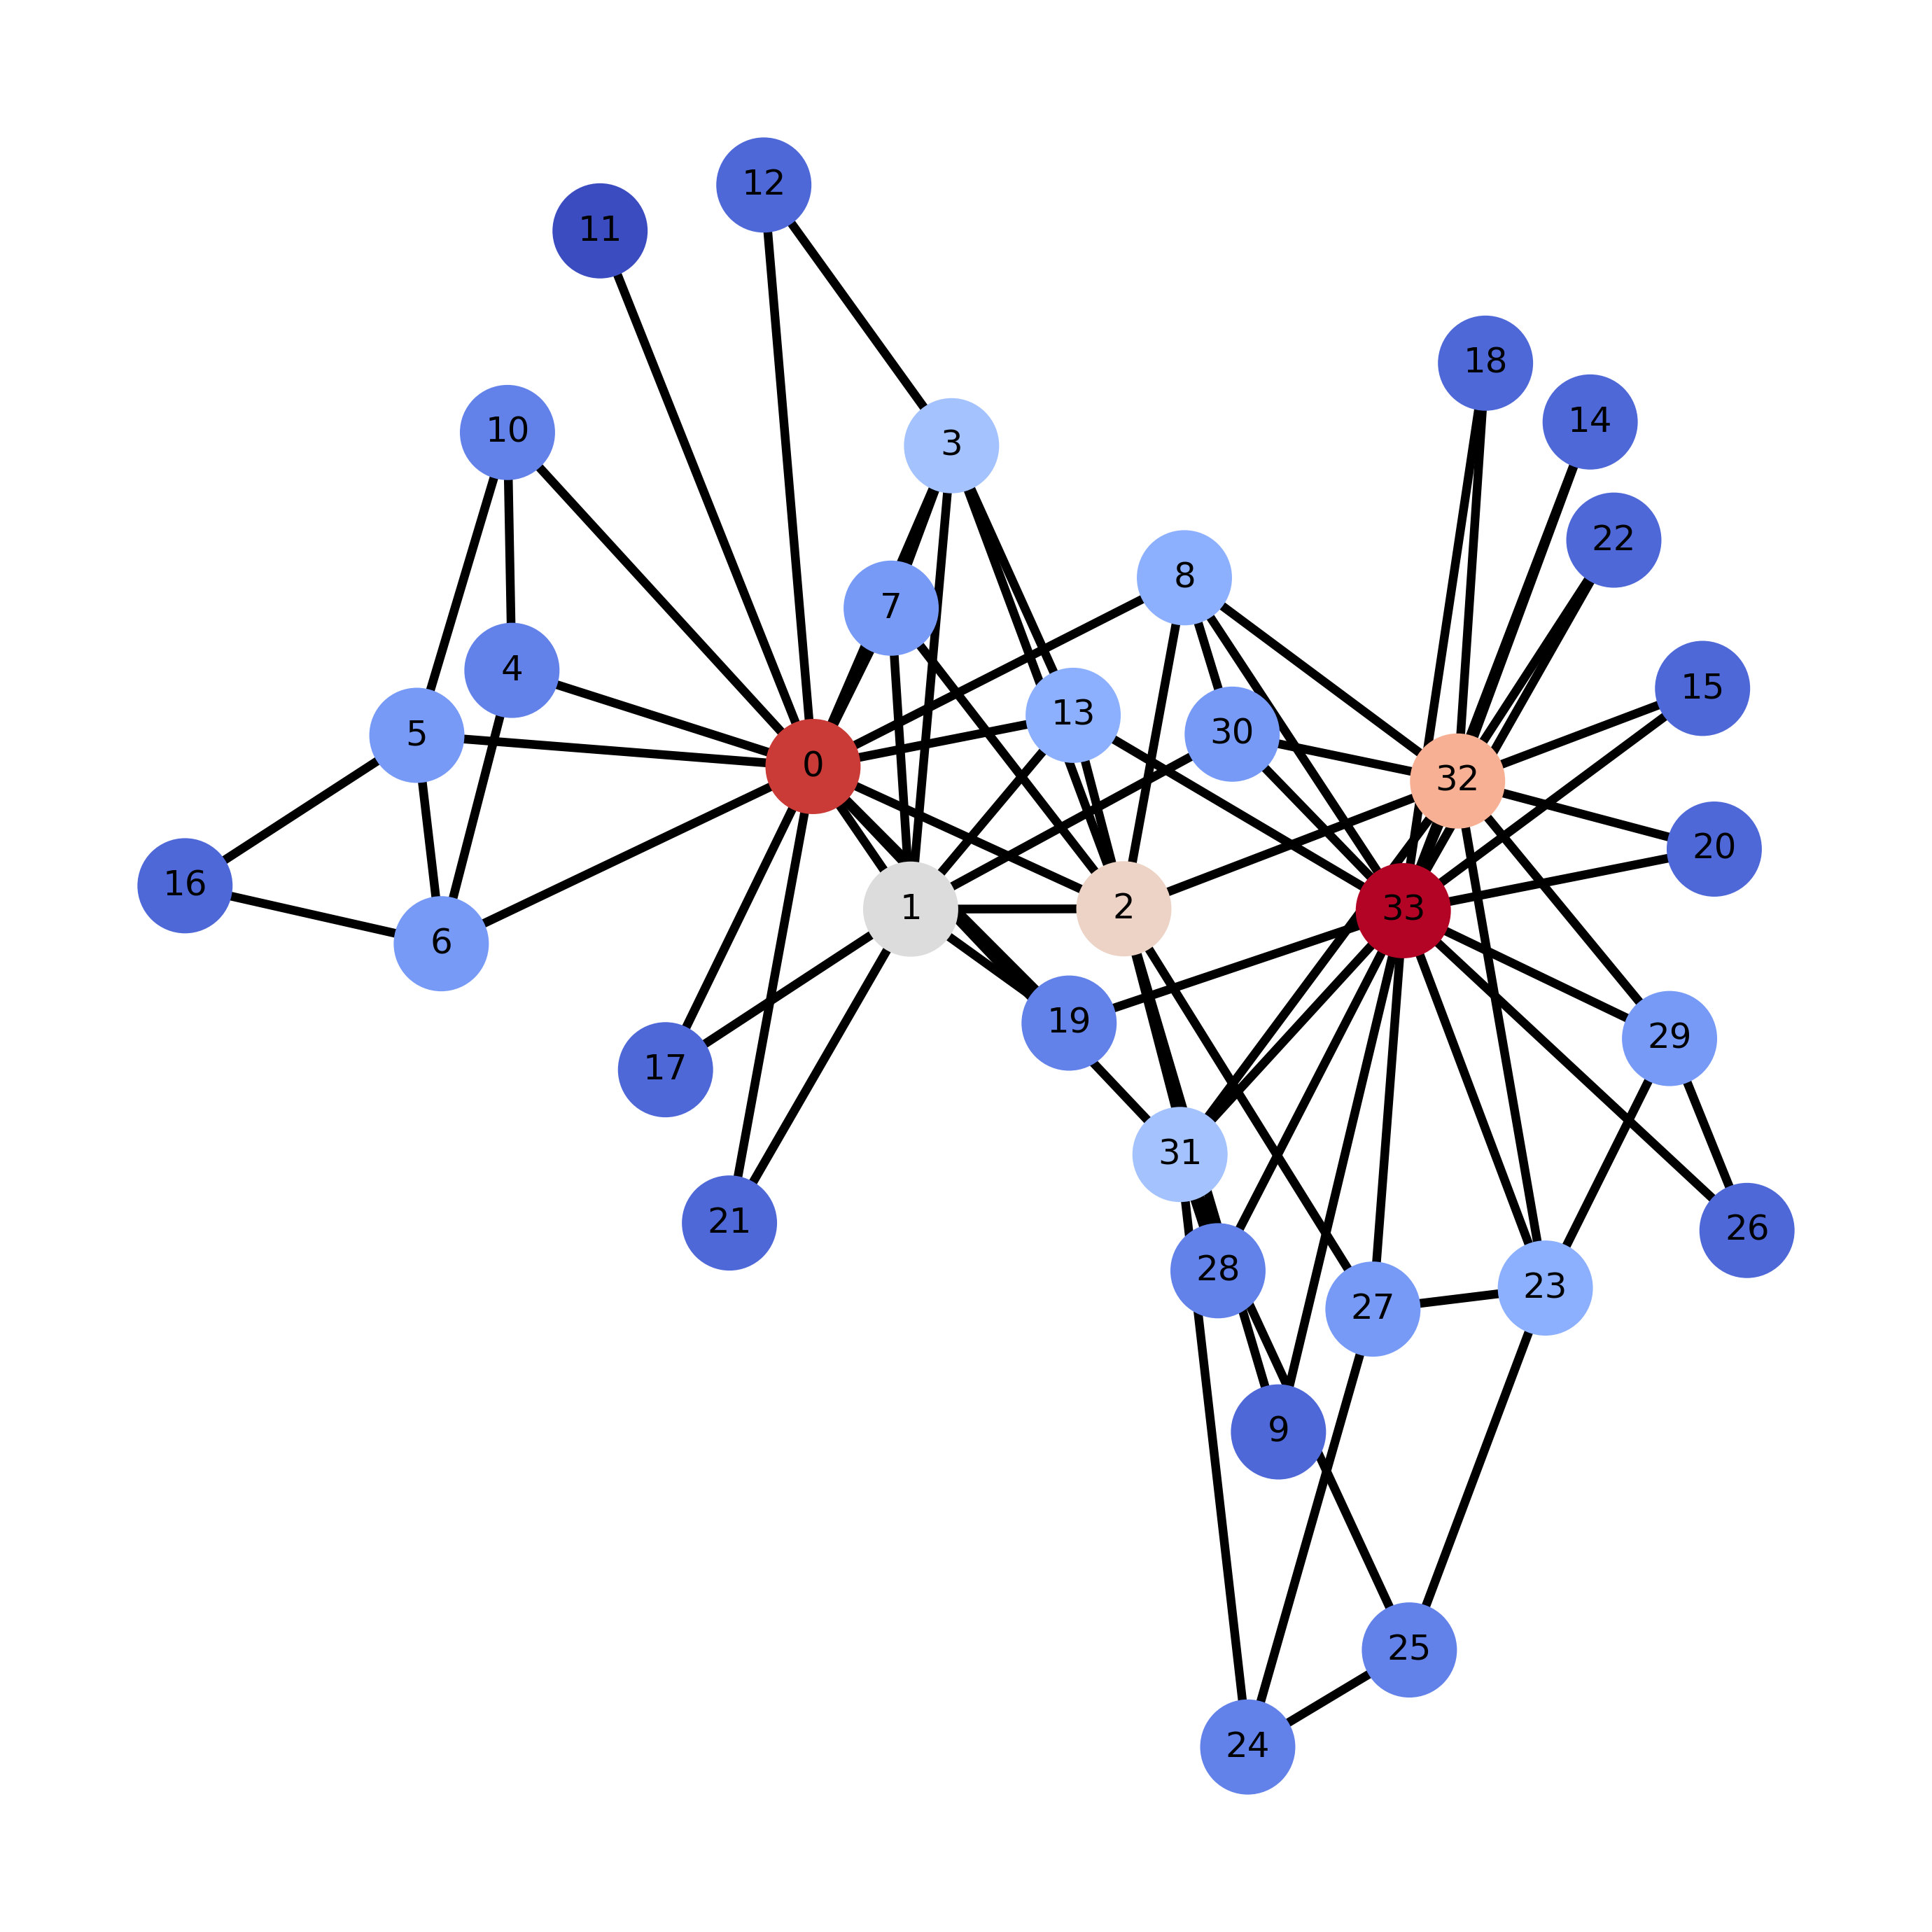

In [5]:

node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.coolwarm

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()


In [ ]:
# Graph Density
nx.density(G)

0.13903743315508021

In [ ]:
# Average Shortest Path Lenght
nx.average_shortest_path_length(G)

2.408199643493761

In [ ]:
nx.diameter(G)

5

Another way to represent the data is as a layerd graph drawing. Each node is positioned in a horizontal row in a hierarchical pattern based on its separation from other nodes. This highlights immediately that nodes 0 and 33 are as seperated from eachother as possible, another interesting point is the isolated group from node 0 off to the right who do not interact with anyone from the main group. Another interesting thing is that node 32 is very close to 33 and has many connections which may be useful in pulling more members, 0 has two less connected nodes 1 and 2 which also are connected to members in the middle.

<ipython-input-6-8a1b500bdf66>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="dot")


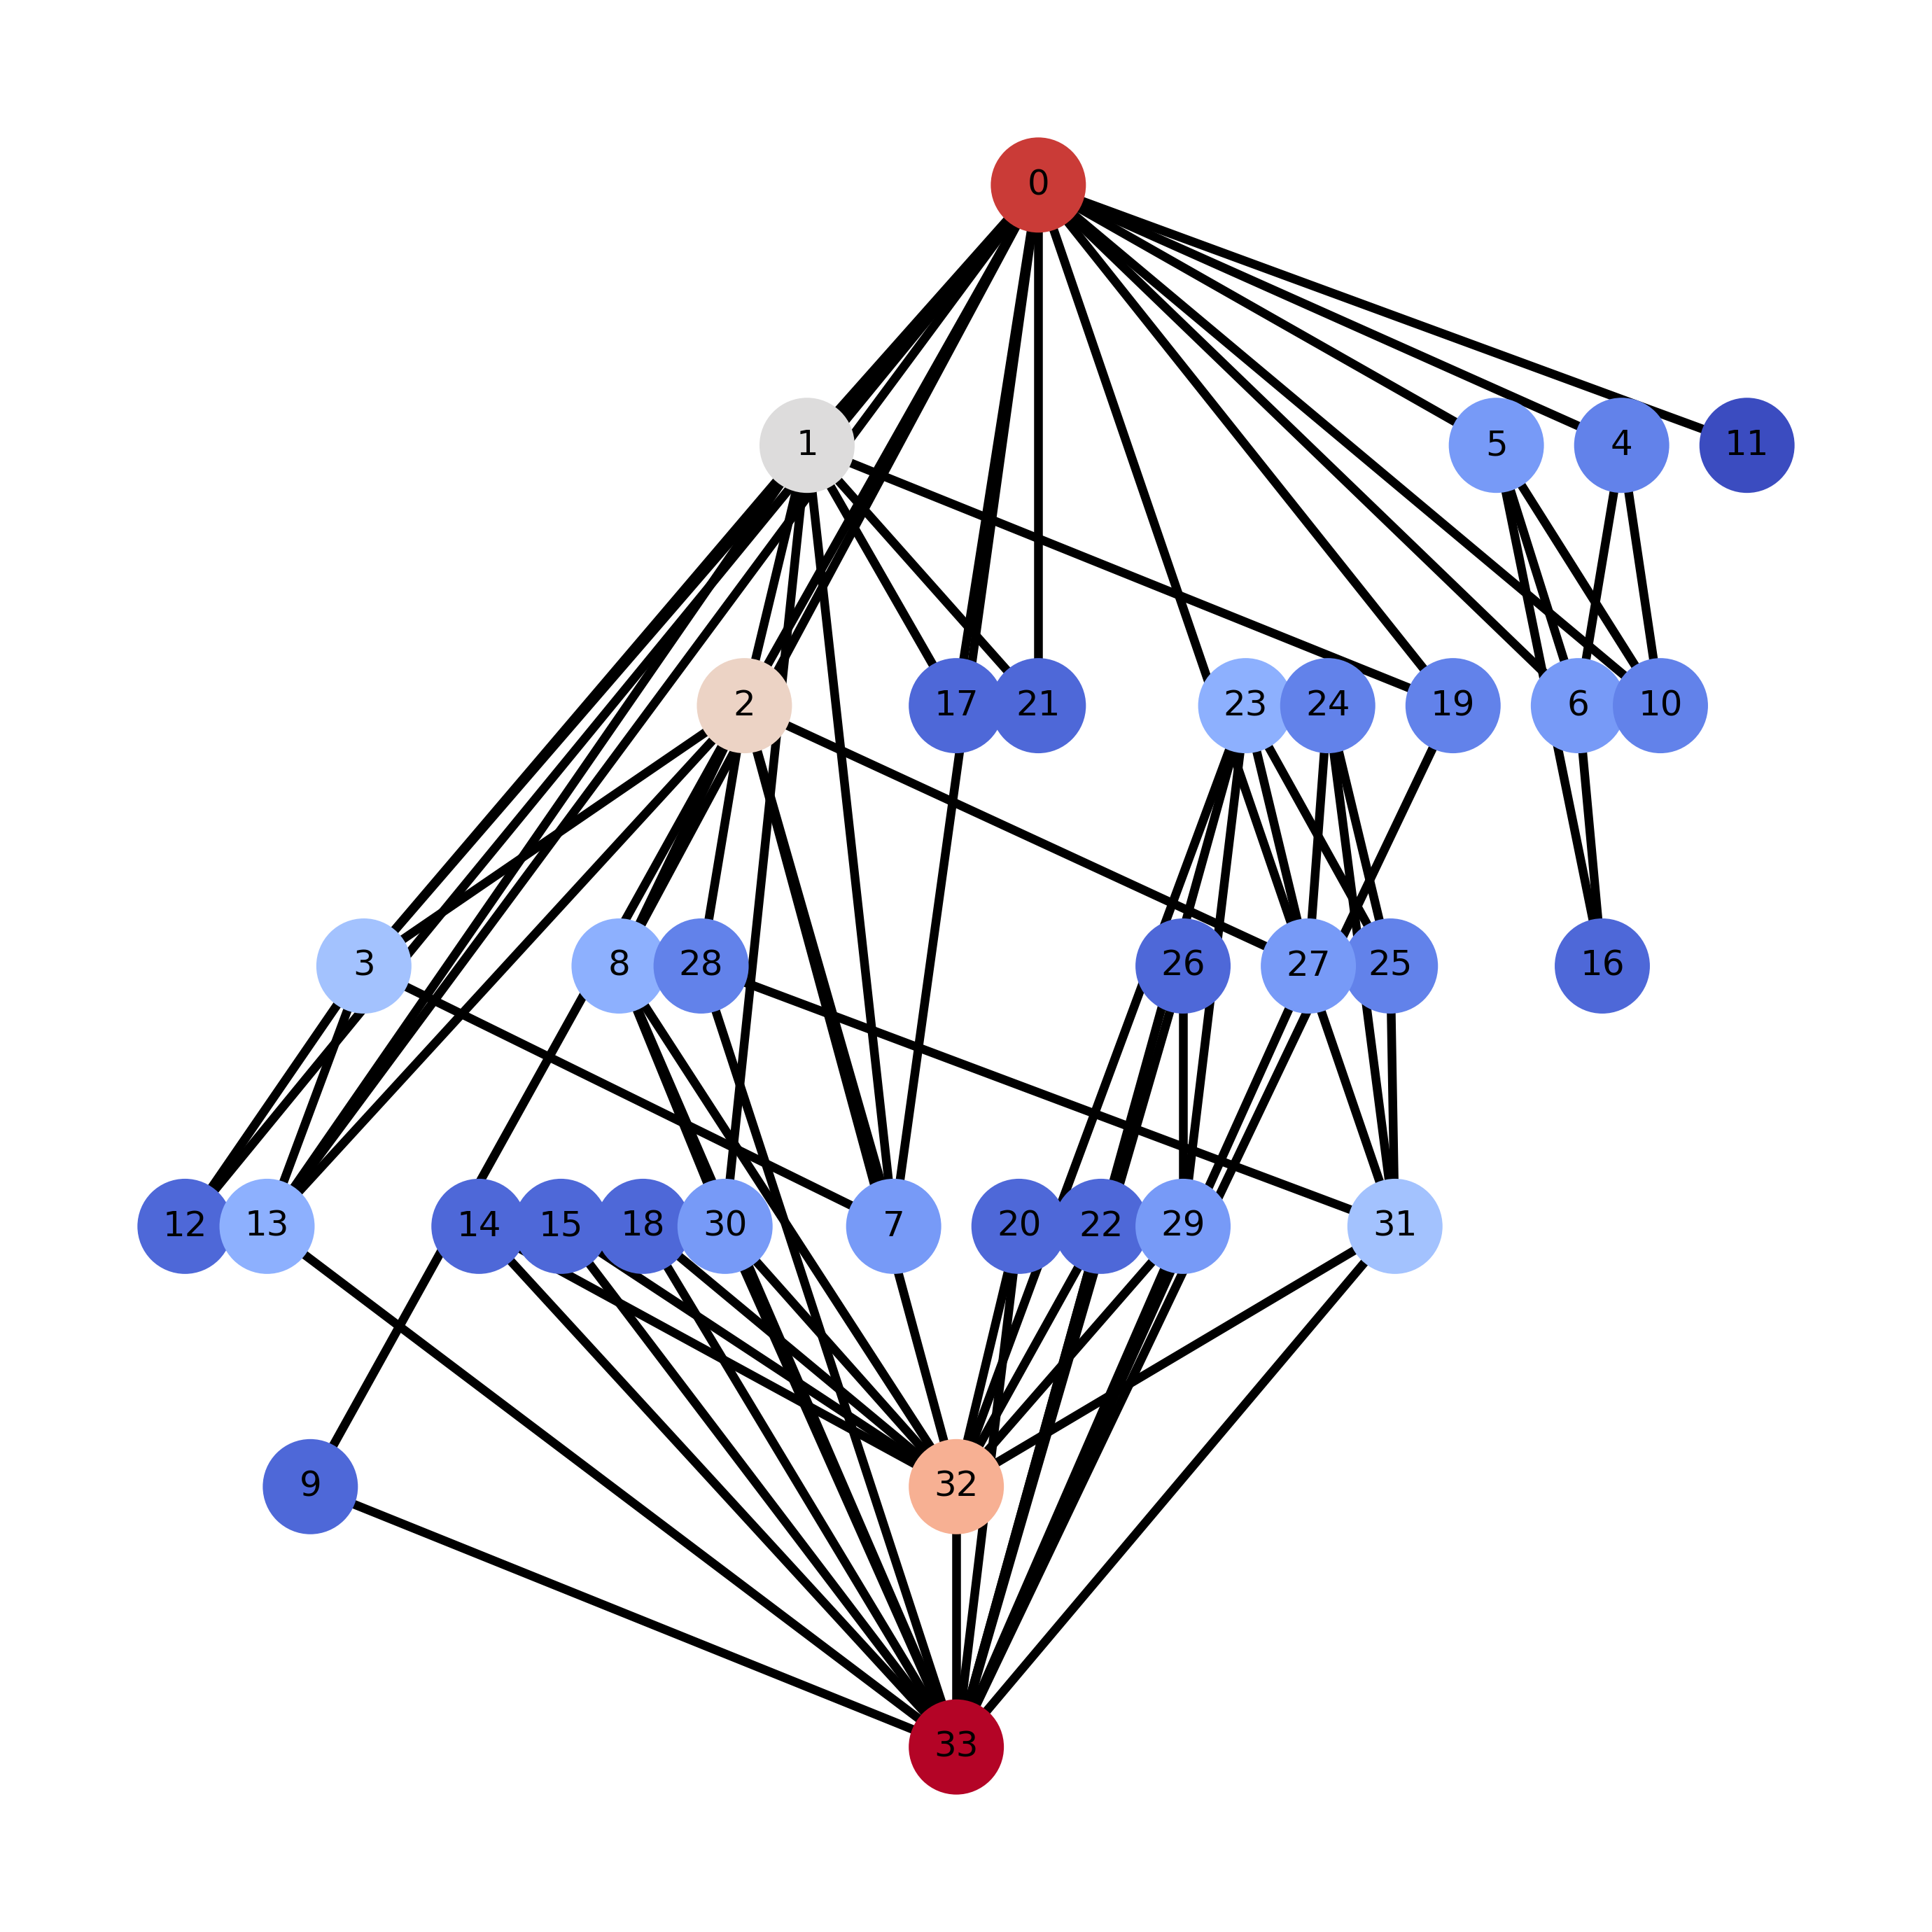

In [6]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="dot")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

Another layout that is useful here is the twopi layout which uses a radial layout styled after Graham Wills 97 paper using it to detect telecomunication fraud. Setting the root node to interesting characters might reveal something interesting as nodes are placed in concentric circles around it depending on their distance, litterally showing their inner circle. Node 33s inner circle has very little overlap with 0s although nodes 1 and 2 seem to be a bridge.

<ipython-input-7-8d74fbe1ae73>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="twopi", root=0)


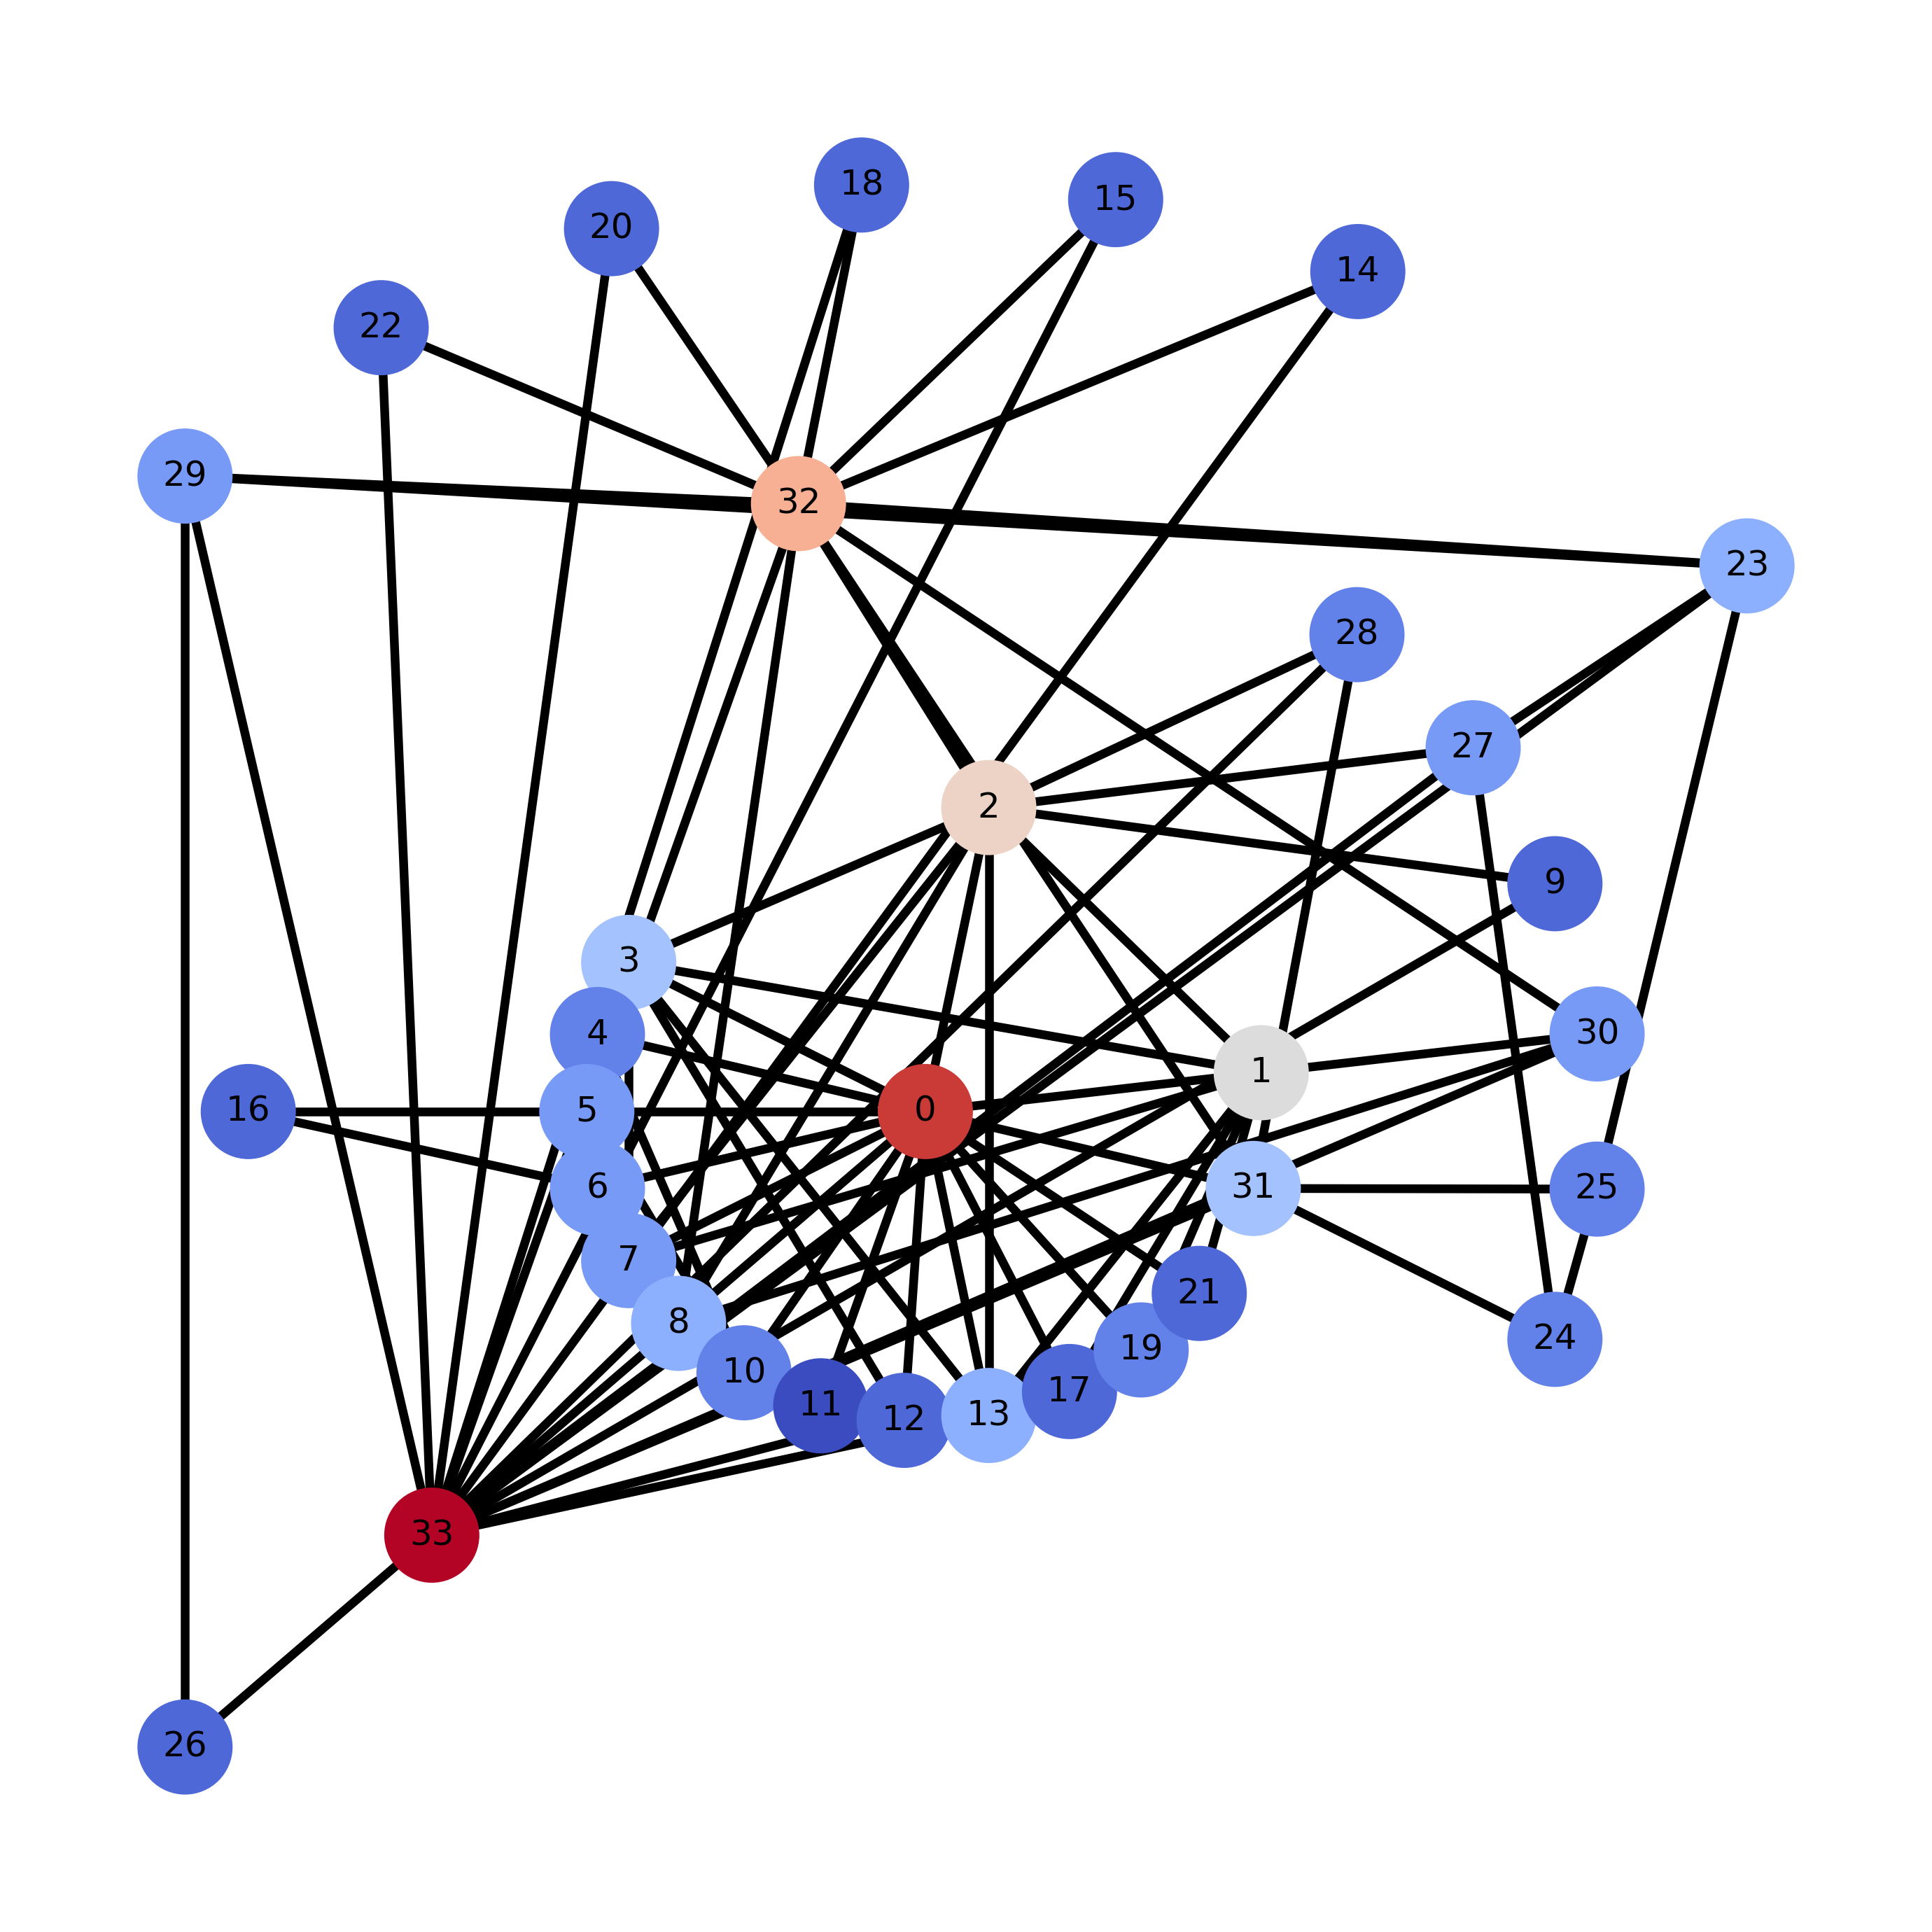

In [7]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="twopi", root=0)
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

In [ ]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(G)

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

Cliques are complete subgraphs; that is, subgraphs where the nodes are all directly connected to each other. For example, using the Karate Club network 
, the cliques are listed below. Note that any two connected nodes in an undirected network are considered to form a clique.

In [ ]:
print (list(nx.find_cliques(G)))


[[0, 1, 17], [0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [0, 1, 19], [0, 1, 21], [0, 4, 10], [0, 4, 6], [0, 5, 10], [0, 5, 6], [0, 8, 2], [0, 11], [0, 12, 3], [0, 31], [1, 30], [2, 32, 8], [2, 9], [2, 27], [2, 28], [5, 16, 6], [33, 32, 8, 30], [33, 32, 14], [33, 32, 15], [33, 32, 18], [33, 32, 20], [33, 32, 22], [33, 32, 23, 29], [33, 32, 31], [33, 9], [33, 13], [33, 19], [33, 26, 29], [33, 27, 23], [33, 28, 31], [24, 25, 31], [24, 27], [25, 23]]


Now, we know that in the Girvan-Newman method, the edges of the graph are eliminated one-by-one based on the EBC score. So, the first task is to find the EBC values for all the edges and then take off the edge with the largest value. The below function performs the exact task:

In [8]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge

In [9]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [10]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups


[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

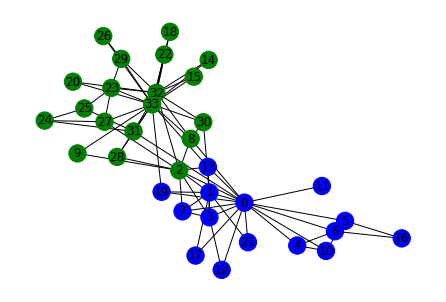

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()